# Recherche des vecteurs de réduction du théorème spectral

*On s'intéresse ici à la seule méthode numérique.*

Soit $A$ une matrice symétrique réelle.

$\blacktriangleright$ *Pour le premier vecteur de la base orthonormée associé au plus grand des $|\lambda_k|$.*

Le principe de la méthode est
- On choisit un vecteur $X_0$ « au hasard ».
- Si $X_n$ est connu pour un certain $n\in\mathbb{N}$, on a calcule $X_{n+1}$ avec la formule
$$X_{n+1}=\frac{1}{\left\|X_n\right\|}.X_n$$
- On s'arrête dès que 
$$\left\|X_{n+1}-X_n\right\|\le\epsilon$$
où $\epsilon$ est la précision demandée.

1. Soit la matrice $A$ donnée ci-après. Appliquer la méthode pour trouver une approximation $\widehat{E_n}$ de la matrice du premier vecteur $E_n$ et de la première valeur $\lambda_n$ tels que définis dans le cours. On prendra $\epsilon=10^{-3}$.
1. *Essai de recherche du deuxième vecteur.*
    1. On recommence l'algorithme en choisissant « au hasard » un vecteur orthogonal à $\widehat{E_n}$. Qu'observe-t-on ?
    1. On recommence l'algorithme en l'appliquant à la matrice
    $$\widehat{A}=A-\widehat{\lambda_n}.\widehat{E_n}\cdot \,^t\widehat{E_n}$$
    Qu'observe-ton ? Justifier.

<div class="alert alert-info">
    
On pourra utiliser les fonctions suivantes
- Un tirage aléatoire dans $[0,1[$ se fait avec la fonction `np.random.random`.
- La norme d'un vecteur se calcule avec la fonction `np.linalg.norm`.

In [1]:
import numpy as np
M = np.matrix([np.random.random() for i in range(25)]).reshape(5, 5)
A = M.transpose()@M
A

matrix([[2.81966542, 1.81143912, 2.21386811, 1.81623839, 1.42747207],
        [1.81143912, 1.53526139, 1.35580168, 1.11034595, 0.94662324],
        [2.21386811, 1.35580168, 1.85954745, 1.41696683, 1.20245633],
        [1.81623839, 1.11034595, 1.41696683, 1.62022925, 0.92680286],
        [1.42747207, 0.94662324, 1.20245633, 0.92680286, 1.15538859]])

**Question 1**

In [2]:
def iter(A, X0, eps):
    n, p = A.shape
    if n != p:
        raise Exception("Ce n'est pas une matrice carrée !")
    X = X0/np.linalg.norm(X0)
    Y = A@X
    Y = Y/np.linalg.norm(Y)
    while np.linalg.norm(X-Y) > eps:
        X = Y
        Y = A@X
        Y = Y/np.linalg.norm(Y)
    return Y

In [3]:
X0 = np.matrix([np.random.random() for i in range(5)]).reshape(5, 1)
E = iter(A, X0, 0.001)
E

matrix([[0.59372352],
        [0.3945116 ],
        [0.47310066],
        [0.40259887],
        [0.32548871]])

In [4]:
# Calcul de la valeur approchée de lambda (notée a)
A@E/E

matrix([[7.80154276],
        [7.80139884],
        [7.80153933],
        [7.80111988],
        [7.80075051]])

In [5]:
# On peut aussi faire la moyenne (si toutes les valeurs sont peu différentes)
a = _[0, 0]
# ATTENTION : il peut y avoir des 0 ou des valeurs très faibles qu'il ne faut pas prendre en compte
a

7.801542764473869

**Question 2-A**

In [6]:
X0 = np.matrix([np.random.random() for i in range(5)]).reshape(5, 1)
iter(A, X0, 0.001)

matrix([[0.59373662],
        [0.39451041],
        [0.47311163],
        [0.40258799],
        [0.32546377]])

In [7]:
np.linalg.norm(_), _.transpose().dot(E)

(1.0, matrix([[1.]]))

Cela ne marche pas (comme annoncé dans le cours), car l'orthogonal de `E` n'est pas stable par la matrice $A$.

**Question 2-B**

In [8]:
# L'idée est donc d'« enlever » le vecteur E
B = A-a*E@E.transpose()
X0 = np.matrix([np.random.random() for i in range(5)]).reshape(5, 1)
iter(B, X0, 0.001)

matrix([[-0.01451054],
        [-0.53101023],
        [-0.00576541],
        [ 0.79187827],
        [-0.30118623]])

On a bien trouvé un nouveau vecteur propre.

In [9]:
F = _
np.linalg.norm(F), F.transpose().dot(E)

(0.9999999999999999, matrix([[-5.59834291e-05]]))

In [10]:
A@F/F

matrix([[0.50078592],
        [0.48057885],
        [0.50093581],
        [0.47956235],
        [0.47938702]])

In [11]:
b = np.mean(_)
b

0.4882499895507664

**Attention** Nous avons supposé que les valeurs propres étaient positives. Il faut légèrement adapter l'algorithme pour obtenir quelque chose qui fonctionne avec des valeurs propres négatives.

In [12]:
X0 = np.matrix([np.random.random() for i in range(5)]).reshape(5, 1)
iter(-A, X0, 0.001)

KeyboardInterrupt: 

In [13]:
def iter2(A, X0, eps):
    n, p = A.shape
    if n != p:
        raise Exception("Ce n'est pas une matrice carrée !")
    X = X0/np.linalg.norm(X0)
    Y = A@X
    Y = Y/np.linalg.norm(Y)
    aux1 = np.linalg.norm(X-Y)
    aux2 = np.linalg.norm(X+Y)
    while min(aux1, aux2) > eps:
        X = Y
        Y = A@X
        Y = Y/np.linalg.norm(Y)
        aux1 = np.linalg.norm(X-Y)
        aux2 = np.linalg.norm(X+Y)
    if aux1 <= eps:
        return Y
    else:
        return -Y

In [14]:
iter2(-A, X0, 0.001)

matrix([[-0.59373711],
        [-0.39450832],
        [-0.47311143],
        [-0.40259276],
        [-0.32545978]])

In [15]:
(-A@_)[0]/_[0]

matrix([[-7.80137067]])

# Révisions sur les méthodes de quadrature

*Une méthode de quadrature est une méthode qui permet de calculer des intégrales.*

## Exercice

*Méthode des trapèzes*

On rappelle que si on a une fonction $f\in\mathscr{C}^2\left([a,b],\mathbb{R}\right)$, la *méthode des trapèzes* consiste à évaluer l'intégrale de $f$ sur $[a,b]$, pour un $n\in\mathbb{N}^*$ par
$$\boxed{I_n=\frac{b-a}{2\,n}\,\left(f(a)+f(b)+\sum_{k=1}^{n-1}f\left(a+k\,\frac{b-a}{n}\right)\right)}$$
On pose, pour $x\in[a,b]$
$$\varphi(x)=\int_a^x f(t)\;\mathrm{d}t-\frac{x-a}{2}\,\left(f(a)+f(x)\right)$$
1. Montrer, en utilisant la formule de Taylor avec reste intégral à l'ordre 2 en $a$ que
$$\left|\varphi(b)\right|\le \frac{(b-a)^3}{12}\,\sup_{t\in[a,b]}\left(\left|f''(t)\right|\right)$$
1. En déduire que, pour $n\in\mathbb{N}^*$
$$\boxed{\left|\int_a^b f(t)\;\mathrm{d}t-I_n\right|\le \frac{(b-a)^3}{12\,n^2}\,\sup_{t\in[a,b]}\left(\left|f''(t)\right|\right)}$$

**Question 1**

La formule de Taylor avec reste intégral nous donne
$$\varphi(b)=\varphi(a)+(b-a)\,\varphi'(a)+\int_a^b (b-t)\,\varphi''(t)\;\mathrm{d}t$$
Par ailleurs, d'après la définition de $\varphi$ et le théorème fondamental de l'analyse, on a, pour $t\in[a,b]$
$$\varphi'(t)=f(t)-\frac{t-a}{2}\, f'(t)-\frac{1}{2}\,(f(a)+f(t))\quad\text{et}\quad \varphi'(a)=0$$
Puis
$$\varphi''(t)=-\frac{t-a}{2}\,f''(t)$$
Donc
$$\forall t\in[a,b],\; \left|\varphi''(t)\right|\le \frac{t-a}{2}\,\sup_{u\in[a,b]}\left|f''(u)\right|$$

In [16]:
import sympy as sp
sp.init_printing()

In [17]:
a, b, t = sp.symbols('a b t', real=True)

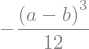

In [18]:
sp.integrate((b-t)*(t-a)/2, (t, a, b)).factor()

**Question 2**

Soit $n\in\mathbb{N}^*$, on pose alors
$$\forall k\in\{0,\ldots,n\},\; a_k=a+k\,\frac{b-a}{n}$$
Comme pour $k\in\{1,\ldots,n\}$, on a
$$\delta_n\overset{\text{Not}}{=}\left|\int_{a_{k-1}}^{a_k} f(t)\;\mathrm{d}t-\frac{a_k-a_{k-1}}{2}\,\left(f\left(a_{k-1}\right)+f\left(a_k\right)\right)\right|\le \frac{(b-a)^3}{12\,n^3}\,\sup_{t\in[a_{k-1},a_k]}\left|f''(t)\right|\le \frac{(b-a)^3}{12\,n^3}\,\sup_{t\in[a,b]}\left|f''(t)\right|$$
Puis
$$\left|\int_a^b f(t)\;\mathrm{d}t -I_n\right|\le \sum_{k=1}^n \delta_n\le \frac{(b-a)^3}{12\, n^2}\, \sup_{t\in[a,b]}\left|f''(t)\right|$$

## Exercice

*Méthode de Gauss*

On se ramène à l'intervalle $[-1,+1]$ en posant 
$$\forall u\in[-1,+1],\; g(u)\overset{\text{Def}}{=} f\left(\frac{a+b}{2}+u\,\frac{b-a}{2}\right)$$
et on va évaluer 
$$\int_{-1}^{+1} g(u)\;\mathrm{d}u$$
La *méthode de Gauss* consiste, pour un $p\in\mathbb{N}^*$ à trouver $p$ réels $\left(\alpha_{1,p},\ldots,\alpha_{p,p}\right)$ et $p$ réels dans $[-1,+1]$, $\left(t_{1,p},\ldots,t_{p,p}\right)$ tels que
$$-1\le t_{1,p}<\cdots<t_{p,p}\le +1\quad\text{et}\quad J_p(f)=\sum_{k=1}^p \alpha_{k,p}\, f\left(t_{k,p}\right)$$
vérifie
$$\forall k\in\{0,\ldots,2\,p-1\},\; J_p\left(t\longmapsto t^k\right)=\int_{-1}^{+1} t^k\;\mathrm{d}t$$
1. Quelle relation y a-t-il entre
$$\int_a^b f(t)\;\mathrm{d}t\quad\text{et}\quad \int_{-1}^{+1}g(u)\;\mathrm{d}u\;?$$
1. Montrer que, si on connaît les $t_{k,p}$, alors il y a existence et unicité des $\alpha_{k,p}$.
1. On pose, pour $n\in\mathbb{N}$ et $x\in\mathbb{R}$
$$L_n(x)\overset{\text{Def}}{=} \frac{1}{2^n\,n!}\, \frac{\mathrm{d}^n}{\mathrm{d}x^n}\left(\left(x^{2}-1\right)^n  \right)$$
    1. Montrer que $\left(L_n\right)_{n\in\mathbb{N}}$ est une famille orthonormée échelonnée en degré pour le produit scalaire ($f$ et $g$ sont dans $\mathscr{C}\left([-1,+1],\mathbb{R}\right)$)
    $$\langle f, g\rangle = \frac{1}{2}\,\int_{-1}^{+1} f(t)\,g(t)\;\mathrm{d}t$$
    1. Vérifier que si $p\in\{1,\ldots,5\}$, $L_p$ possède $p$ racines simples dans $[-1+1]$.
    1. Montrer que, plus généralement, $L_p$ possède exactement $p$ racines simples dans $[-1,+1]$ (que nous prendons comme $t_{1,p}$, ..., $t_{p,p}$)
    1. Montrer qu'alors le système
    $$\forall k\in\{0,\ldots,2\,p-1\},\;J_p\left(t\longmapsto t^k\right)=\int_{-1}^{+1} t^k\;\mathrm{d}t$$
    admet une solution unique pour $\alpha_{1,p}$, ..., $\alpha_{p,p}$ et les calculer pour $p\in\{1,\ldots,5\}$.

On admet que
$$\left|\int_{-1}^{+1} g(u)\;\mathrm{d}u-J_p(g)\right|\le \frac{2^{2\,p+1}\, (p!)^4}{(2\,p+1)\, [(2\,p)!]^3}\, \underbrace{\max_{u\in[-1,+1]}\left|g^{(2\,p)}(u)\right|}_{\overset{\text{Not}}{=} M_{2\,p}}$$

**Question 1**

On a par le changement de variable $t=\frac{a+b}{2}+u\,\frac{b-a}{2}$
$$\int_a^b f(t)\;\mathrm{d}t=\frac{b-a}{2}\,\int_{-1}^{+1} g(u)\;\mathrm{d}u$$

**Question 2**

Le déterminant du système est un déterminant de Van der Monde.

**Question 3-A**

On calcule pour $n\le m$ 
$$\left\langle L_n,L_n\right\rangle=\frac{1}{2}\, \int_{-1}^{+1} \frac{1}{2^{n+m}\, n!\,m!}\,\frac{\mathrm{d}^n}{\mathrm{d}x^n}\left(\left(x^2-1\right)^n\right)\,\frac{\mathrm{d}^m}{\mathrm{d}x^m}\left(\left(x^2-1\right)^m\right)\;\mathrm{d}x$$
En utilisant le fait que
$$\forall k\in\{0,\ldots,n-1\},\; x\longmapsto \frac{\mathrm{d}^k}{\mathrm{d}x^k}\left(\left(x^2-1\right)^n\right) \text{ s'annule en $\pm1$}$$
et en faisant $n$ intégrations par parties, on obtient
$$\langle L_n,L_n\rangle=\frac{(-1)^n}{2^{m+n+1}\,n!\,m!} \,\int_{-1}^{+1} \left(x^2-1\right)^n\, \frac{\mathrm{d}^{n+m}}{\mathrm{d} x^{n+m}}\left(\left(x^2-1\right)^m\right)\;\mathrm{d}x$$
1. Si $m>n$, alors 
$$\forall x\in [-1,1],\; \frac{\mathrm{d}^{n+m}}{\mathrm{d} x^{n+m}}\left(\left(x^2-1\right)^m\right)=0$$
donc $\langle L_n,L_m\rangle=0$.
1. Si $n=m$, on obtient
$$\langle L_n,L_n\rangle=\frac{(-1)^n}{2^{2\,n+1}\, \left(n!\right)^2} \, \int_{-1}^{+1} \left(x^2-1\right)^n\;\mathrm{d}x$$
Le changement de variable $x=\sin(t)$ nous ramène à une intégrale de Wallis.

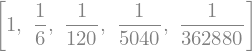

In [19]:
[(-1)**n/(2**(2*n+1)*sp.factorial(n)**2)*sp.integrate((t**2-1)**n, (t, -1, 1)) for n in range(5)]

La famille est bien orthogonale, masi elle n'est pas orthonormée. Le coefficient indiqué sert imposer $L_n(1)=1$. Comme seuls les zéros de $L_n$ nous intéressent, le coefficient de proportionnalité n'est pas important.

In [20]:
[(sp.diff((t**2-1)**n, t, n)/2**n/sp.factorial(n)).subs({t: 1}) for n in range(5)]

**Question 3-B**

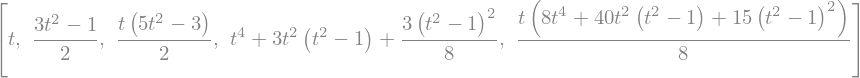

In [21]:
L = [sp.diff((t**2-1)**n/(2**n*sp.factorial(n)), t, n) for n in range(1, 6)]
L

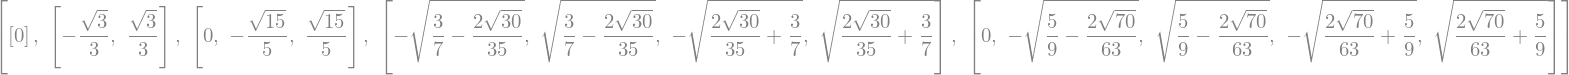

In [22]:
racines = [sp.solve(P, t) for P in L]
racines

In [23]:
def myevalf(l):
    return list(map(lambda t: t.evalf(), l))

In [24]:
[myevalf(i) for i in _]

**Question 3-C**

Pour ceux qui aiment les exercices classiques ! On écrit $L_n(x)$ sous la forme
$$L_n(x)=\prod_{i=1}^p (x-\alpha_i)^{n_i}\,Q(x)$$
où 
$$-1\le \alpha_1<\cdots<\alpha_p\le 1$$
sont les racines de $L_n$ dans $[-1,1]$.

Puis
$$\Delta=\left\{k\in\{1,\ldots,p\},\; n_k\text{ est impair}\right\}$$
et on exprime que si $\Delta\ne\{1,\ldots,n\}$ alors
$L_n$ est orthogonal à la fonction polynomiale
$$x\longmapsto \prod_{i\in\Delta}\left(x-\alpha_i\right)$$
ce qui est impossible car l'intégrale est $>0$.

**Question 3.D**

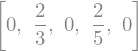

In [25]:
b = [sp.integrate(t**k, (t, -1, 1)) for k in range(1, 6)]
b

In [26]:
alpha = sp.IndexedBase('\\alpha')

eqs = []
for i in range(1, 5):
    r = racines[i]
    eq = [sp.Eq(sum([alpha[j] for j in range(i+1)]), 2)]
    aux = [sp.Eq(sum([alpha[j]*r[j]**(l+1) for j in range(i+1)]), b[l])
           for l in range(i)]
    eq.extend(aux)
    eqs.append(sp.solve(eq, [alpha[j] for j in range(i+1)]))

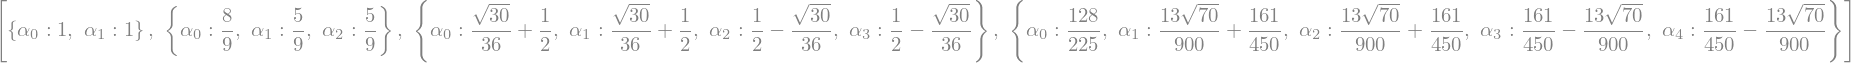

In [27]:
eqs

## Exercice

On veut calculer 
$$I=\int_0^2 e^{-t^2}\;\mathrm{d}t\quad\text{à $10^{-5}$ près}$$
1. Utiliser `numpy` pour avoir une valeur approchée et en connaître sa précision.
1. Combien faudrait-il de valeurs de $f(t_k)$ pour calculer $I$ à la précision demandée avec la méthode des trapèzes ?
1. En effectuant la méthode de Gauss avec $p=3$ sur $n$ intervalles, combien faudrait-il de valeurs de $f(t_k)$ pour calculer $I$ à la précision demandée avec cette méthode ?